# Limits of Diversification

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import edhec_risk_kit as erk

The market cap of the stock is the number of shares outstanding multiplied by the price. One way to think about it is the total value of the company.

If we want to look at the total value of the market, we can add up all the market caps of all the companies and that is the total market size.

If we're building a portfolio where all the components of that portfolio, all the individual stocks in that portfolio, are proportionate to how big they are, how much value is embedded in that stock price, then we could weigh it by the market caps. That's how the S&P 500 or the FTSE 100 or the MSCI indices are done (with minor correction for liquidity, called float adjustment).

We are going to build a market index very similar to a cap-weighted index to understand what happens to correlations when that stock market index is rising and falling.

If we where building a food industry portfolio we would need:

1. Total market capitalization of all the stocks in that industry.
    * We need the number of firms that made up that industry.
    * The average size of those firms.

In [2]:
ind_return = erk.get_ind_returns()
ind_nfirms = erk.get_ind_nfirms()
ind_size = erk.get_ind_size()

In [3]:
ind_return.shape

(1110, 30)

In [4]:
ind_nfirms.shape

(1110, 30)

In [5]:
ind_size.shape

(1110, 30)

In [6]:
ind_nfirms.head()

,food,beer,smoke,games,books,hshld,clths,hlth,chems,txtls,...,telcm,servs,buseq,paper,trans,whlsl,rtail,meals,fin,other
1926-07,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-08,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-09,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-10,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-11,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4


## Market capitalization

Number of firms x the average size

In [7]:
ind_mktcap = ind_nfirms * ind_size
ind_mktcap.shape

(1110, 30)

## Total Market capitalization

We want to find out the fraction of the total market capitalization that is in each industry. We need the total market cap which is each industry's market cap, sum it across the columns.

In [8]:
total_mktcap = ind_mktcap.sum(axis='columns')

In [9]:
total_mktcap.plot(figsize=(12,6))

The market capitalization has increased dramatically. But we can see that when crashes happen a lot of market cap is lost.

## Capitalization Weight

Now that we have the market cap we need the weight of each of these industries over time.

divide each industrys market cap by the total market cap at that point in time.

In [10]:
total_mktcap.head()

1926-07    26657.94
1926-08    27436.34
1926-09    28060.41
1926-10    28057.23
1926-11    27198.40
Freq: M, dtype: float64

In [11]:
ind_mktcap.head()

,food,beer,smoke,games,books,hshld,clths,hlth,chems,txtls,...,telcm,servs,buseq,paper,trans,whlsl,rtail,meals,fin,other
1926-07,1547.14,21.36,955.52,184.87,24.04,178.16,220.32,178.64,979.03,80.34,...,1751.80,40.80,396.90,212.10,4951.34,2.38,1539.45,64.92,225.96,97.00
1926-08,1552.30,20.25,967.52,190.19,26.66,177.04,237.96,180.60,1056.21,80.60,...,1766.35,44.25,404.18,227.16,5031.26,1.80,1536.81,66.00,226.56,102.04
1926-09,1591.00,25.74,1024.48,191.10,29.34,169.44,231.48,187.11,1114.01,87.23,...,1804.80,45.15,417.27,220.92,5255.48,1.90,1521.63,65.64,236.04,108.84
1926-10,1597.02,26.76,1030.72,201.32,28.84,169.84,228.36,188.09,1163.99,88.66,...,1820.80,45.90,416.64,208.62,5241.42,1.76,1522.95,64.80,232.32,104.64
1926-11,1542.84,25.86,1041.28,191.66,31.58,161.12,228.36,185.78,1106.02,88.92,...,1818.70,44.67,411.18,196.80,5087.50,1.48,1485.99,61.98,220.20,95.76


In [12]:
ind_capweight = ind_mktcap.divide(total_mktcap, axis="rows")

In [13]:
ind_capweight.head()

,food,beer,smoke,games,books,hshld,clths,hlth,chems,txtls,...,telcm,servs,buseq,paper,trans,whlsl,rtail,meals,fin,other
1926-07,0.058037,0.000801,0.035844,0.006935,0.000902,0.006683,0.008265,0.006701,0.036726,0.003014,...,0.065714,0.001531,0.014889,0.007956,0.185736,0.000089,0.057748,0.002435,0.008476,0.003639
1926-08,0.056578,0.000738,0.035264,0.006932,0.000972,0.006453,0.008673,0.006583,0.038497,0.002938,...,0.064380,0.001613,0.014732,0.008280,0.183379,0.000066,0.056014,0.002406,0.008258,0.003719
1926-09,0.056699,0.000917,0.036510,0.006810,0.001046,0.006038,0.008249,0.006668,0.039700,0.003109,...,0.064318,0.001609,0.014870,0.007873,0.187292,0.000068,0.054227,0.002339,0.008412,0.003879
1926-10,0.056920,0.000954,0.036736,0.007175,0.001028,0.006053,0.008139,0.006704,0.041486,0.003160,...,0.064896,0.001636,0.014850,0.007436,0.186812,0.000063,0.054280,0.002310,0.008280,0.003730
1926-11,0.056725,0.000951,0.038285,0.007047,0.001161,0.005924,0.008396,0.006831,0.040665,0.003269,...,0.066868,0.001642,0.015118,0.007236,0.187051,0.000054,0.054635,0.002279,0.008096,0.003521


On July 1926 food was 0.05, 5.8% of the total market cap.

In [14]:
ind_capweight["1926"].sum(axis="columns")

1926-07    1.0
1926-08    1.0
1926-09    1.0
1926-10    1.0
1926-11    1.0
1926-12    1.0
Freq: M, dtype: float64

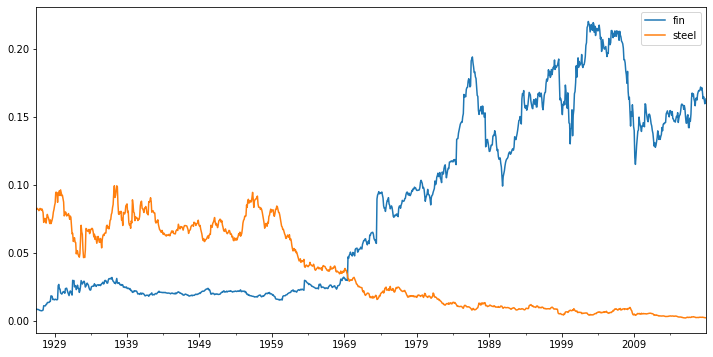

In [15]:
ind_capweight[["fin", "steel"]].plot(figsize=(12,6))

Over time financial companies have become a bigger part of the market while steel has become a smaller part of the market.

Now that we have all the cap weights for the individual components we can construct a cap-weighted market index just like the S&P500. 

The S&P500 takes the top 500 stocks and computes a portfolio that consists of the values of all of those companies proportional to their market cap.

In [16]:
total_market_return = (ind_capweight * ind_return).sum(axis="columns")

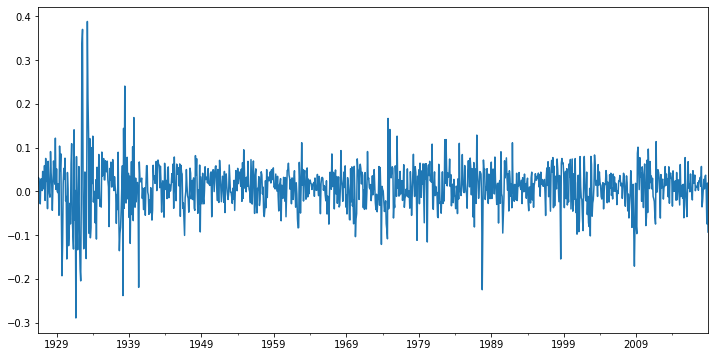

In [17]:
total_market_return.plot(figsize=(12,6))

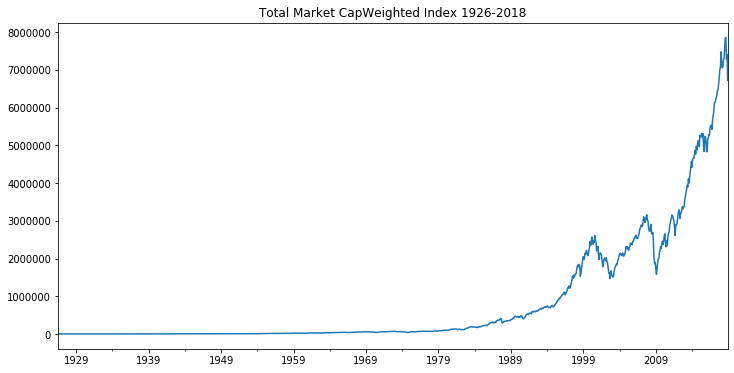

In [18]:
total_market_index = erk.drawdown_df(total_market_return).wealth
total_market_index.plot(figsize=(12,6), title="Total Market CapWeighted Index 1926-2018")

Next we want to look at the returns of the market over a 3 year period.

The endgame is to look at how returns are related to market correlations.

## Trailing 36 month return

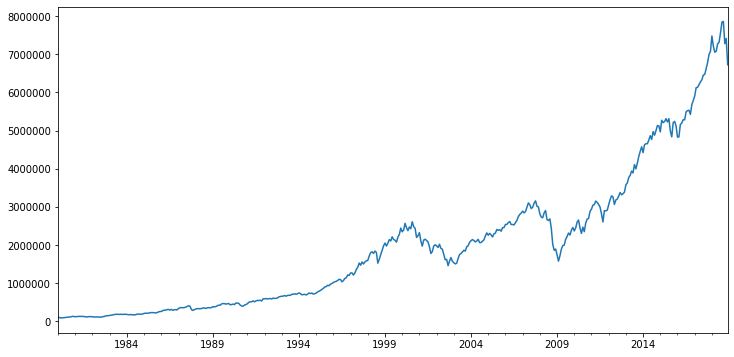

In [19]:
total_market_index["1980":].plot(figsize=(12,6))

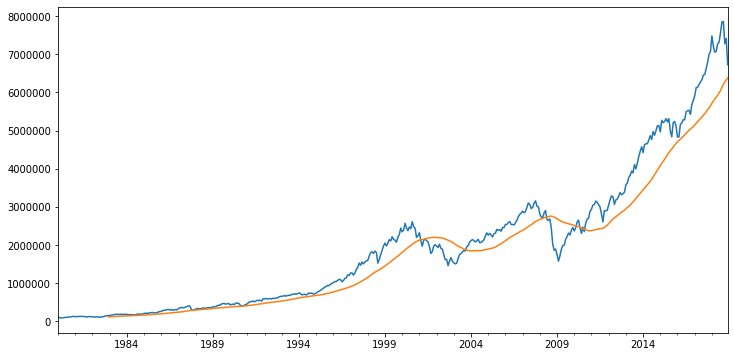

In [20]:
total_market_index["1980":].plot(figsize=(12,6))
total_market_index["1980":].rolling(window=36).mean().plot()

Now we can look at the returns of that index. Not the index itself.

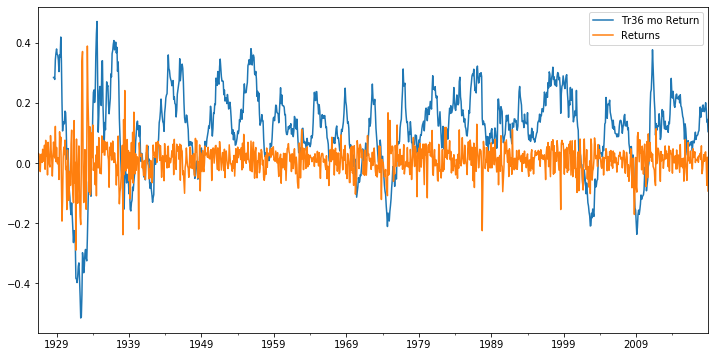

In [24]:
# The aggregate is applied to each 36 month window
tmi_tr36rets = (total_market_return.rolling(window=26)
                .aggregate(erk.annualize_rets, periods_per_year=12))

tmi_tr36rets.plot(figsize=(12,6), label="Tr36 mo Return", legend=True)
total_market_return.plot(label="Returns", legend=True)

Is there some relationship between this and correlations? 

If correlations are going to be able to bail us out we want to make sure that there is still correlation potential in these down markets.

To do that we need some measure of "are stocks correlating or are they de-correlating" during this up markets and down markets?

We need to measure the average correlation across industries to see if there's a relationship between the avg. correlation observed over time and the returns observed over time.

## Rolling Correlations and MultiIndexes

In [25]:
ts_corr = ind_return.rolling(window=36).corr()
ts_corr.tail()

food      beer     smoke     games     books     hshld  \
2018-12 whlsl  0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        rtail  0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        meals  0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        fin    0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        other  0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                  clths      hlth     chems     txtls  ...     telcm  \
2018-12 whlsl  0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        rtail  0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        meals  0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        fin    0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        other  0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                  servs     buseq     paper     trans     whlsl     rtail  \
2018-12 whlsl  0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        rtail  0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        meals  0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        fin    0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        other  0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                  meals       fin     other  
2018-12 whlsl  0.643879  0.746480  0.767652  
        rtail  0.616947  0.611883  0.619918  
        meals  1.000000  0.502563  0.605226  
        fin    0.502563  1.000000  0.734837  
        other  0.605226  0.734837  1.000000  

[5 rows x 30 columns]

This is a multiIndex DataFrame. It is a time series of correlation matrices. This is not exactly what we want.

We want to look at the average correlation per time period.

In [27]:
ts_corr.index.names = ["date", "industry"]

In [28]:
ts_corr.tail()

food      beer     smoke     games     books     hshld  \
date    industry                                                               
2018-12 whlsl     0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        rtail     0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        meals     0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        fin       0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        other     0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                     clths      hlth     chems     txtls  ...     telcm  \
date    industry                                          ...             
2018-12 whlsl     0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        rtail     0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        meals     0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        fin       0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        other     0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                     servs     buseq     paper     trans     whlsl     rtail  \
date    industry                                                               
2018-12 whlsl     0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        rtail     0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        meals     0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        fin       0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        other     0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                     meals       fin     other  
date    industry                                
2018-12 whlsl     0.643879  0.746480  0.767652  
        rtail     0.616947  0.611883  0.619918  
        meals     1.000000  0.502563  0.605226  
        fin       0.502563  1.000000  0.734837  
        other     0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [29]:
ind_tr36corr = ts_corr.groupby(level="date").apply(lambda cormat: cormat.values.mean())

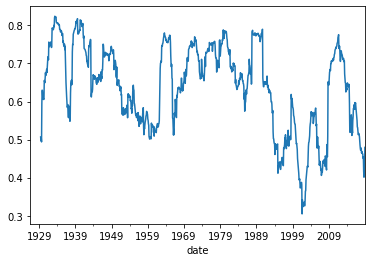

In [30]:
ind_tr36corr.plot()

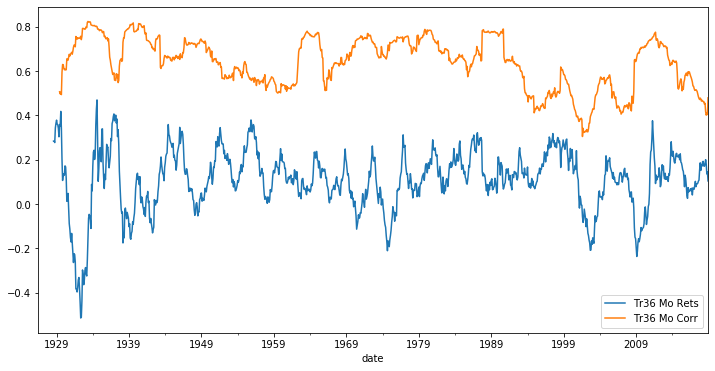

In [31]:
tmi_tr36rets.plot(label="Tr36 Mo Rets", figsize=(12,6), legend=True)
ind_tr36corr.plot(label="Tr36 Mo Corr", legend=True)

Blue line is in units of return centered around ~0

Orange line is in units of correlation.

It's not obvious what's going on. Let's fix it.

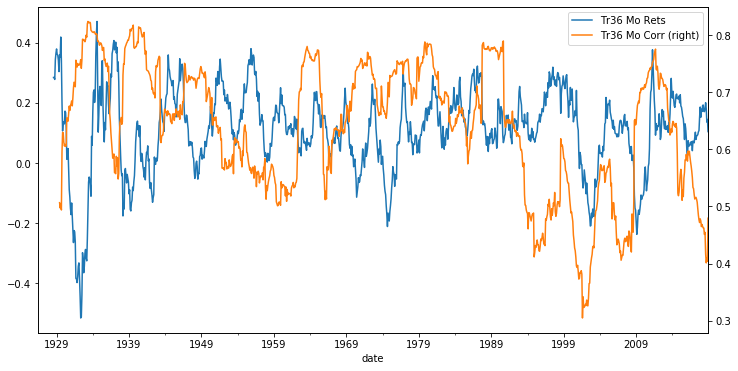

In [33]:
tmi_tr36rets.plot(label="Tr36 Mo Rets", figsize=(12,6), legend=True)
ind_tr36corr.plot(label="Tr36 Mo Corr", legend=True, secondary_y=True)

It's very clear that when the market is tanking, correlations are rising. When the markets are rising correlations are going back to normal.

Diversification is failing when most needed. When the market is plummeting we want correlations to bail us out. 

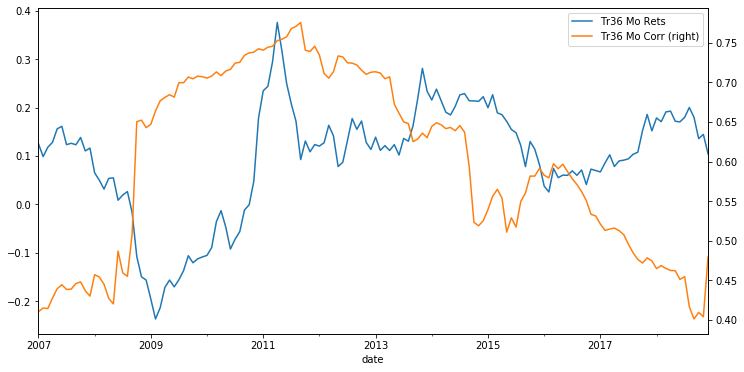

In [34]:
tmi_tr36rets["2007":].plot(label="Tr36 Mo Rets", figsize=(12,6), legend=True)
ind_tr36corr["2007":].plot(label="Tr36 Mo Corr", legend=True, secondary_y=True)

In [35]:
tmi_tr36rets.corr(ind_tr36corr)

-0.17984273333812548

## Diversification does not help you when markets are crashing